# Time Series Data for GMM 

시간의 흐름이 들어간다..! 
* 주가 : 뭔가 잠재적인 흐름에 대한 변수?
* 텍스트 데이터 : 역시 잠재적 factor 존재 (문법을 지켜야 한다, 글을 쓰는 의도 등) ex. POS tagger

In [4]:
from IPython.display import Image

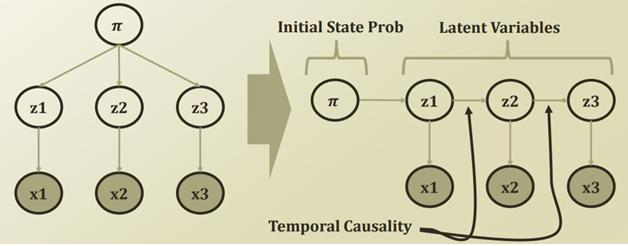

In [2]:
Image('./image/hmm_1.jpg')

왼쪽 그림은 시간 개념이 빠진 파이(latent factor z에 영향을 주는 파라미터와) z들 (어떠한 군집을 나누게 되는 latent factor), 그에 따른 변수 x들로 표현(독립된 시도) <br>
<br>
오른쪽 그림은 시간 개념을 추가하여 파이는 initial state prob이고 계속해서 latent factor z들에게 영향을 끼치고 그에 따른 랜덤 변수 x가 나옴

# Hidden Markov Model 

* x : Observation(이산적이거나 연속적일 수 있다. 확률 분포를 어떻게 정하느냐에 달렸음.)
  - $x_1,...x_T$ : time 1에서 time T까지의 Observation
<br>
* z : Latent state(어떤 k 개의 변수..?)
  - 이 latent variable이 연속적이게 되면 Kalman filter라 부름

* Initial state probabilities
  - $P(z_1) ~ Mult(\pi_1,...,\pi_k)$ 다항분포에서 z1(첫번째 latent factor)을 샘플링하게 되는데 이 다항분포의 파라미터로서 파이가 존재(이것을 학습)
<br>
* Transition probabilities
  - $P(z_t | z^i_{t-1} = 1)$ ~  $Mult(a_{i,1},...a_{i,k})$ latent factor z가 전이 되는 확률 (이 전 타임에 어떠한 클러스터에 있었는데 이번 타임에 어떠한 클러스터 i에 있을 확률) ex. 전 타임의 POS가 Noun일 때, 이번 타임의 POS(별 확률)
  - $ P(z^j_t = 1|z^i_{t-1}=1) = a_{i,j}$ // 클러스터 i에서 j로 갈 확률
<br>
* Emission probabilities
  - $P(x_t|z^i_t=1)$ ~ $Mult(b_{i,1},...b_{i,m})$ ~ $f(x_t|\theta_i)$
  - $P(x^j_t=1|z^i_t=1) = b_{i,j}$ 
  <br>i번째 클러스터 일때 j 상태의 x를 observation을 할 확률

## Forward-Backward Probability 

## The three major questions of HMM 

* Know how to solve the evaluation question
* Know how to solve the decoding question
* know how to solve the learning question

HMM 혹은 모델의 베이지안 네트워크의 Topology가 주어졌을 때

### Evaluation question 

* Given $\pi, a, b, X$
* Find $P(X|M,\pi,a,b)$
* How much is X likely to be observed in the trained model?
<hr>
어떤 훈련된 모델에서 X가 관찰됐을 때, 얼마나 likely한가?

### Decoding question 

* Given $\pi, a, b, X$
* Find $argmax_zP(Z|X,M,\pi,a,b)$
* What would be the most probable sequences of latent states?
<hr>
모든 파라미터를 알고 있고, 모든 X가 관찰 되었을 때 가장 적합한 Latent factor의 흐름을 알아내라! (__POS tagging?!__)
<br>
__Supervised learning__

### Learning question 

* Given X
* Find $argmax_{\pi,a,b}P(X|M,\pi,a,b)$
* What would be the underlying parameters of the HMM given the observations?
<hr>
보여지는 X를 가장 잘 설명하는 latent factors들을 찾아내라!(Inference)
<br>
__Unsupervised learning__

## Obtaining $\pi$, a,b given X and M

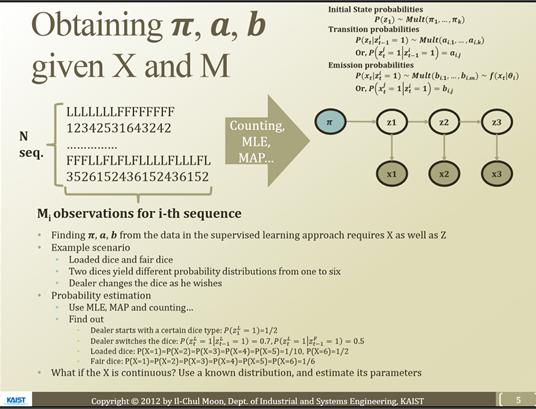

In [2]:
Image('./image/hmm_2.jpg')

### Loaded dice(불공평한 주사위) & Fair dice(공평한 주사위) => L,F (Latent factor!!) 

딜러에게 부탁해서 latent factor(L,F)와 X(실제 주사위값)를 모두 얻었음. ==> __training data__를 얻은 셈~!(__Supervised Learning__)<br>
<br>
P(L->L) = $P(z_{t+1}=L |z_t=L)$ => a <br>
$P(x_t=1|z_t=L)$ => b
<br>
<br>
Counting, MLE, MAP!

## Joint Probability

베이지안 네트워크로 보고,, P(X,Z)를 계산해내면 뭔가 쉽게 대답할 수 있을 것..

### Factorize 

$P(X,Z) = P(x_1,...x_t,z_1...,z_t)$ <br>
        = $P(z_1)P(x_1|z_1)P(z_2|z_1)P(x_2|z_2)P(z_3|z_2)P(x_3|z_3)$<br>
        =
$\pi_{idx(z_1=1)}b_{idx(x_1=1),idx(z_1=1)}a_{idx(z_1=1),idx(z_2=1)}....$

### 불공평한 주사위 나와서 166을 X로 얻었다고 가정

이 주사위는 6이 나올 확률이 1/2이고 나머지 1~5는 1/10 <br>
그리고 a (즉, L->L을 약 70% 정도로 얻었다고 생각해보자)<br>
(F->F 는 50%라고 가정) __모든 파라미터를 알고 있을 때__

P(166, LLL) = $\frac{1}{2}$x$\frac{1}{10}$x$\frac{7}{10}$x$\frac{1}{2}$x$\frac{7}{10}$x$\frac{1}{2}$ = 0.0061 <br>
<br>
P(166, FFF) = $\frac{1}{2}$x$\frac{1}{6}$x$\frac{1}{2}$x$\frac{1}{6}$x$\frac{1}{2}$x$\frac{1}{6}$ = 5.7870e-04

3번 던졌을 때 가능한 시나리오는 8개이지만 여기선 일단 2개를 __evaluation__을 해봄..! 하지만 __decoding__하기는 어려움.. 뭔가 다른 방법이 필요하닷 <주사위 숫자의 시퀀스만 보고 어떤 주사위 썼는지 알아내기>

## Marginal Probability 

* Eventually, we only want to use X, and marginalize Z
  - Just like GMM, $P(X|\pi) = \sum_ZP(X,Z|\theta)$
  - In HMM, $P(X|\pi,a,b) = \sum_ZP(X,Z|\pi,a,b)$
* P(X) = $\sum_ZP(X,Z) = \sum_{z_1}...\sum_{z_t}P(x_1,...x_t,z_1,...,z_t)$<br>
= $\sum_{z_1}...\sum_{z_t}\pi_{z_1}\prod^T_{t=2}a_{z_{t-1},z_t}\prod^T_{t=1}b_{z_t,x_t}$

계산량이 많다..<br>
이 복잡한 수식을 뭔가 재귀적으로 풀어내보자

__P(A,B,C) = P(A)P(B|A)P(C|A,B)__  # 이걸 상기하고..

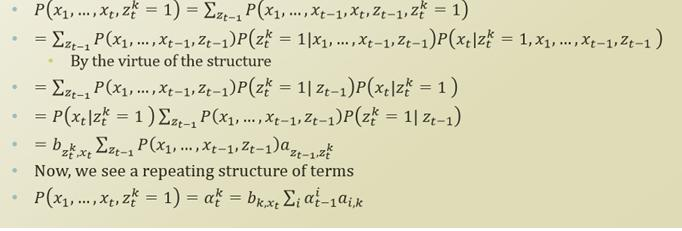

In [3]:
Image('./image/hmm_3.jpg')

이 수식을 따라가도 보면(눈이 팽글 팽글 도는군..) $z_{t-1}$이 주어지면 $z_t$를 알기 위해 그 전의 모든 x값들은 알 필요가 없음(독립적으로)(2->3 줄)<br>
역시나 $z_t$가 주어졌을 때, 다른 모든 값들 필요 없음
<br>
<br>
__3번째 줄 수식으로 간단히 정리__<br>
4번째 줄은 시그마 텀과 관련 있냐 없냐로 좀 정리 <br>
정리하고 보니 4번째 줄의 $P(x_t|z^k_t=1)은 b_{z^k_t,x_t}$(emission)로 정리 된다. $P(z^k_t=1|z_{t-1})은 a_{z_{t-1},z^k_t}$(transition)로 정리

### $\alpha$를 추가하여 재귀적 형태로 

__$P(x_1,...,x_t,z^k_t=1) = \alpha^k_t = b_{k,x_t}\sum_i\alpha^i_{t-1}a_{i,k}$ 형태로 정리__

## Dynamic Programming 

재귀적 문제를 풀어내는 방법 중 하나 <br>
overlapping subinstances를 재활용!(계산량 줄인다)

## Memoization 

bottom-up 방식~! 

In [1]:
def fib(n):
    global numCalls # 함수를 몇번 call하는 카운트
    numCalls += 1
    #print 'fib called with', n
    if n <= 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [2]:
def fastFib(n, memo):
    global numCalls
    numCalls += 1
    #print 'fib1 called with', n
    if not n in memo:
        memo[n] = fastFib(n-1,memo) + fastFib(n-2,memo)
    return memo[n]

def fib1(n):
    memo = {0:1, 1:1} # 2개를 이미 연산해둠(memoization)
    return fastFib(n, memo)

In [3]:
numCalls = 0
n = 30
res = fib(n)
print 'fib of', n, '=', res, 'numCalls =', numCalls

numCalls = 0
n = 30
res = fib1(n)
print 'fib of', n, '=', res, 'numCalls =', numCalls

fib of 30 = 1346269 numCalls = 2692537
fib of 30 = 1346269 numCalls = 59


## Foward Probability Calculation 

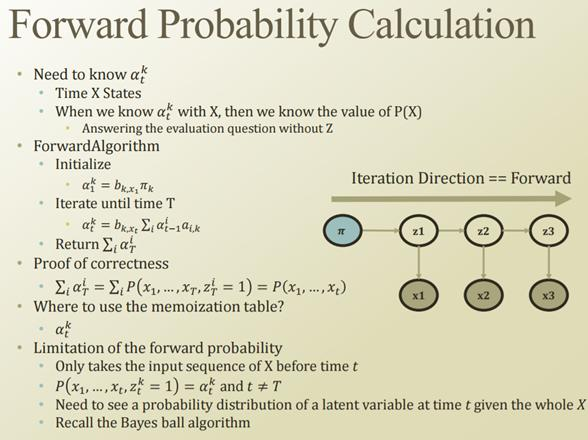

In [5]:
Image('./image/hmm_4.jpg')

### FowardAlgorithm

- $\alpha^k_1 = b_{k,x_1}\pi_k$로 초기화 후,
- 앞서 구한 재귀식으로 계속해서 $\alpha^k_t$ 구해 나간다 <hr>
어떤 타임 t에서 클러스터 i에 속할 확률 리턴<br>
$\sum_i\alpha^i_T$  // __evaluation question__의 답변 <br>
-> 위 식을 계산하면 $P(x_1,...x_t)$만 남게 되서 X만 존재하고 Z는 주어지지 않았을 때의 답을 할 수 있게 됌(evaluation)
<br>
<br>
* Memoization table은 $\alpha^k_t$ 계산에 쓰임(time 1부터 만들어 나갔기 때문!)
<br>
하지만 만약 해당 t가 whole time인 T와 같지 않다면 그 x 뒷쪽 x들을 고려 안하게 됌. (어떠한 내재한(latent) trend를 무시하게 될 수도 있다는..?) 그렇기에 __Backward__ 계산이 필요

## BackwardAlgorithm 

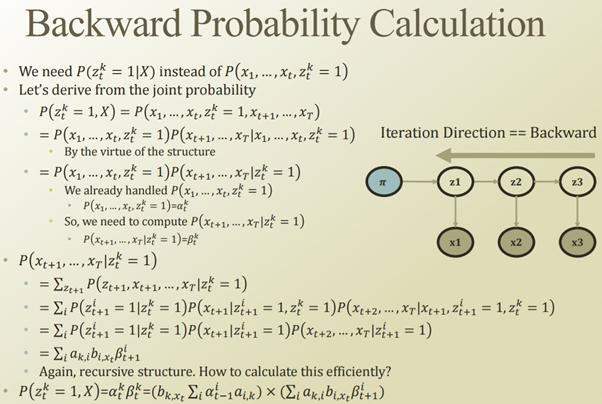

In [6]:
Image('./image/hmm_5.jpg')

whole time에 대한 x, 즉 X에 대하여 t의 latent factor가 어디에 속할지를 알려고 함.<br>
역시 P(A,B) = P(A)P(B|A) 성질을 이용하여 나눠서 보자. 그리고 우리가 앞서 알파로 다뤘던 부분을 제거하면 결국
<br>
$P(x_{t+1},...x_T|z^k_t=1)$이 남는다. $\beta^k_t$ <br>
<br>
이 것을 marginalize하는데 factorize도 해본다.. 정리하면 <br>
= $\sum_ia_{k,i}b_{i,x_t}\beta^i_{t+1}$
<br>
<br>
역시나 이를 위해 dp를 사용할 수 있다.
<br>
<br>
__$P(z^k_t=1,X)=\alpha^k_t\beta^k_t$__   # fowardxbackward로 나타낼 수 있다.

# Decoding Problem 

$\pi$, a,b,X를 알고 있을 때(이미 학습이 된 상태에서) 새로운 시퀀스가 들어오면 적절한 Z 시퀀스를 할당해줄 수 있게 된다!!

## Viterbi decoding 

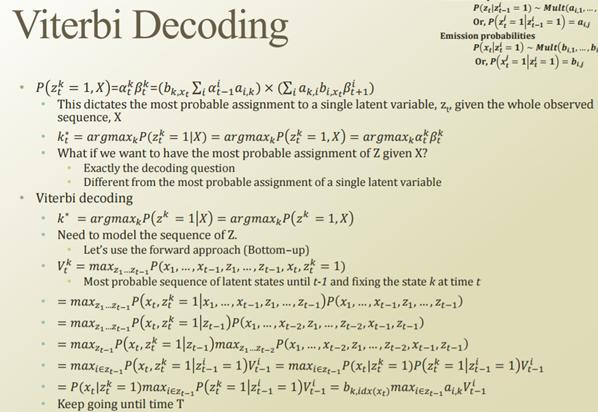

In [7]:
Image('./image/hmm_6.jpg')

X의 시퀀스가 발견되었을 때 t의 cluster가 k일 확률<br>

$P(z^k_t=1,X)=\alpha^k_t\beta^k_t$ <br>
= $b_{k,x_t}\sum_i\alpha^i_{t-1}a_{i,k}$ x $\sum_ia_{k,i}b_{i,x_t}\beta^i_{t+1}$ <br>
<br>
풀어쓴 형식은 다시 recursive하게 수행할 수 있다.(dynamic programming으로)<br>
<br>
하지만 우리는 $z_t$만 구하고 싶은게 아니라 Z를 구하고 싶다!<br>
=> __Decoding Problem__

$k^* = argmax_kP(z^k=1|X) = argmax_kP(z^k=1,X)$ <br>
<br>
dp를 사용하여 $z_1$부터 채워 나가면서 다시 retrace하여 가장 확률이 높아지는 시퀀스 Z를 찾자 <br>
<br>
$V^k_t = max_{z_1,...z_{t-1}}P(x_1,...,x_{t-1},z_1,...,z_{t-1},x_t,z^k_t=1)$ <br>
time t에 state가 t일 때, t-1까지의 가장 적절한 latent states sequence <br>
이걸 factorize하면...
<br>
$V^k_t = b_{k,idx(x_t)}max_{i \in z_{t-1}}a_{i,k}V^i_{t-1}$ <br>
<br>
요걸 다시 재귀적으로 Dynamic Programming으로 풀어낸다.!! 이걸 T까지 하기 되면 가장 적절한 시퀀스 Z를 찾을 수 있다.

### ViterbiDecodingAlgorithm 

* Initialize
  - $V^k_1 = b_{k,x_1}\pi_k$
* Iterate until time T
  - $V^k_t = b_{k,idx(x_t)}max_{i \in z_{t-1}}a_{i,k}V^i_{t-1}$ (확률 저장) 이 V를 높여주는 방향으로 iteration
  - $trace^k_t = argmax_{i \in z_{t-1}}a_{i,k}V^i_{t-1}$ (이전 타임의 k가 무엇이었는지도 저장)
* Return $P(X,Z^*) = max_kV^k_T,z^*_T = argmax_kV^k_T,z^*_{t-1}=trace^{z^*_t}_t$

이론적으로는 이렇게 끝나지만,, 이것을 현실에서 구현하면 __underflow problem__이 발생한다..!! time step이 길 때, 확률을 계속해서 곱해나가면 소수점이 엄청 길어진다...<br>
<br>
그래서 요것을 log domain에서 구현한다..! log를 취해줘서 곱셈을 덧셈으로 바꿔서 푼다..!

http://stackoverflow.com/questions/9729968/python-implementation-of-viterbi-algorithm

## Learning Problem

이는 X만 주어졌을 때 다른 parameter들을 학습하는 것(unsupervised)

## Baum-Welch Algorithm 

* Importance of $\pi$,a,b
  - Forward , Viterbi 등은 모두 이 파라미터에 의존
  - 하지만 이는 X와 Z 모두 관측했다고 가정할 때 가능한 얘기(Z는 관측하기 힘들다..)
<br>
<br>
* 우리는 Z를 모른다고 생각하고 X에 가장 적절한 Z를 찾아보자(사실은 이것이 가장 현실에 가까움)<br>
<br>
* 전략
  - X를 가지고서 optimized $\pi$,a,b를 찾는다.
  - X,$\pi$,a,b에 가장 적합한 Z를 찾는다.
  - 이후 Viterbi decoding 가능
* 이걸 위해 EM algorithm 사용
  - $\pi$,a,b,z를 Iterative하게 최적화

## EM Algorithm 

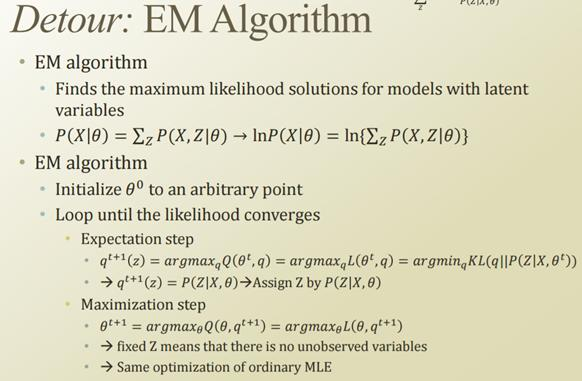

In [8]:
Image('./image/hmm_7.jpg')

latent variables을 가진 모델의 maximum likelihood solutions을 찾는 것! <br><br>
$P(X|\theta) = \sum_ZP(X,Z|\theta) -> ln(P(X|\theta)) = ln{\sum_ZP(X,Z|\theta)}$
<br>
<br>
* Initialize $\theta^0$ to an arbitrary point($\pi$,a,b 초기화)
* Loop until the likelihood converges
  - Expectation step : KL Divergence를 0로 만들어 주도록,,? Assign Z by P(Z|X,$\theta$)
  - Maximization step

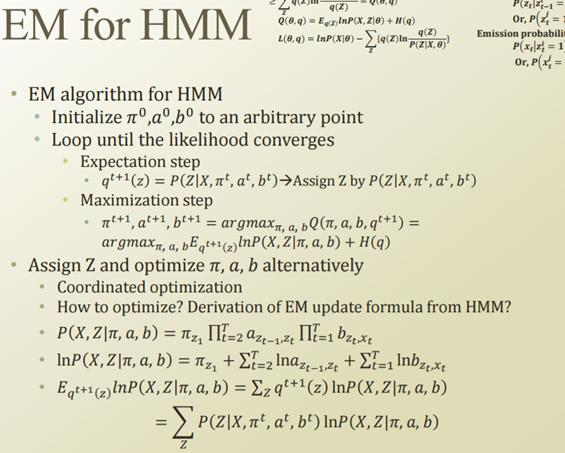

In [9]:
Image('./image/hmm_8.jpg')

프린트 참고...

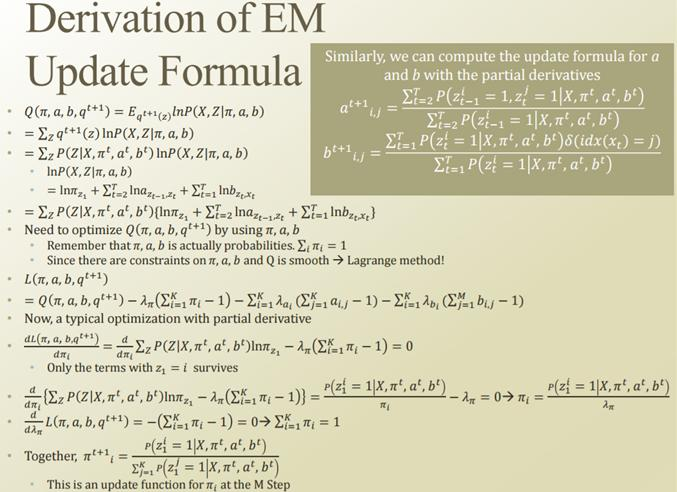

In [10]:
Image('./image/hmm_9.jpg')

파라미터를 다 더했을 때 1이 되어야 한다는 제약조건을 걸기위해 라그랑지 멀티플라이어를 사용해주고,,,, 각 파라미터에 대해 편미분을 하여 0이 되도록 한다면 다음 (EM의 iteration)의 파라미터를 구할 수 있게 된다. 

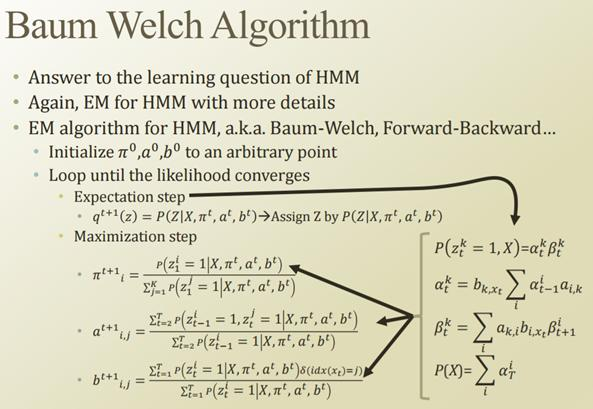

In [11]:
Image('./image/hmm_10.jpg')

 forward, backward term을 계산해 expectation하고 대입하여 maximize하는 HMM을 위한 EM이 바로 Baum Welch Algorithm이닷..!